# Handwritten Character Recognition

# TensorFlow Metal Setup

In [1]:
import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.13.0


# Importing Req Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import random


# Data Preparation

In [3]:
data = pd.read_csv('/Volumes/Personal/ML_Code Alpha/Handwritten-Character-Recognition/A-Z handwritten characters/A_Z Handwritten Data.csv').astype('float32')
X = data.drop('0', axis=1).values
y = data['0'].values

X = X.reshape(X.shape[0], 28, 28, 1) / 255.0
y = to_categorical(y, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (297960, 28, 28, 1)
Testing data shape: (74490, 28, 28, 1)
Training labels shape: (297960, 26)
Testing labels shape: (74490, 26)


# Sample Data Visualization 

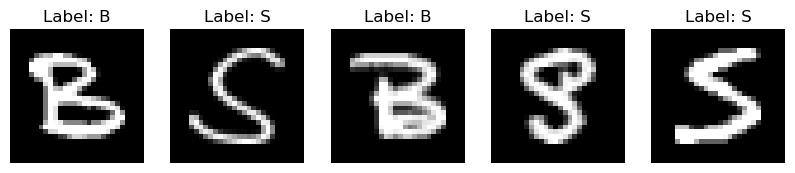

In [4]:
def visualize_data(X, y, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {chr(np.argmax(y[i]) + ord('A'))}")
        plt.axis('off')
    plt.show()

visualize_data(X_train, y_train)


# Data Augmentation

In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


#  Model Architecture

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(26, activation='softmax')
])


2024-08-26 22:48:15.385499: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-26 22:48:15.385518: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-08-26 22:48:15.385528: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-08-26 22:48:15.385941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-26 22:48:15.386303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Model Compilation and Training

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('/Volumes/Personal/ML_Code Alpha/Handwritten-Character-Recognition/best_model.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint, reduce_lr])


Epoch 1/20


2024-08-26 22:48:16.043201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4653/4656 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.8456

2024-08-26 22:49:19.446634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4656/4656 [==============================] - 77s 16ms/step - loss: 0.5291 - accuracy: 0.8456 - val_loss: 0.1233 - val_accuracy: 0.9644 - lr: 0.0010
Epoch 2/20
   9/4656 [..............................] - ETA: 1:10 - loss: 0.3409 - accuracy: 0.9097

/Users/chintubharath/tensorflow-metal/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4656/4656 [==============================] - 80s 17ms/step - loss: 0.2774 - accuracy: 0.9181 - val_loss: 0.0972 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 3/20
4656/4656 [==============================] - 80s 17ms/step - loss: 0.2424 - accuracy: 0.9290 - val_loss: 0.0910 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 4/20
4656/4656 [==============================] - 80s 17ms/step - loss: 0.2240 - accuracy: 0.9344 - val_loss: 0.0849 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 5/20
4656/4656 [==============================] - 81s 17ms/step - loss: 0.2101 - accuracy: 0.9383 - val_loss: 0.0812 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 6/20
4656/4656 [==============================] - 82s 18ms/step - loss: 0.2020 - accuracy: 0.9415 - val_loss: 0.0757 - val_accuracy: 0.9785 - lr: 0.0010
Epoch 7/20
4656/4656 [==============================] - 83s 18ms/step - loss: 0.1973 - accuracy: 0.9429 - val_loss: 0.0797 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 8/20
4656/4656 [==============================] - 8

In [8]:
model.save('model.h5')

# Evaluation and Visualization

  84/2328 [>.............................] - ETA: 4s

2024-08-26 23:16:02.830436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2328/2328 [==============================] - 4s 1ms/step


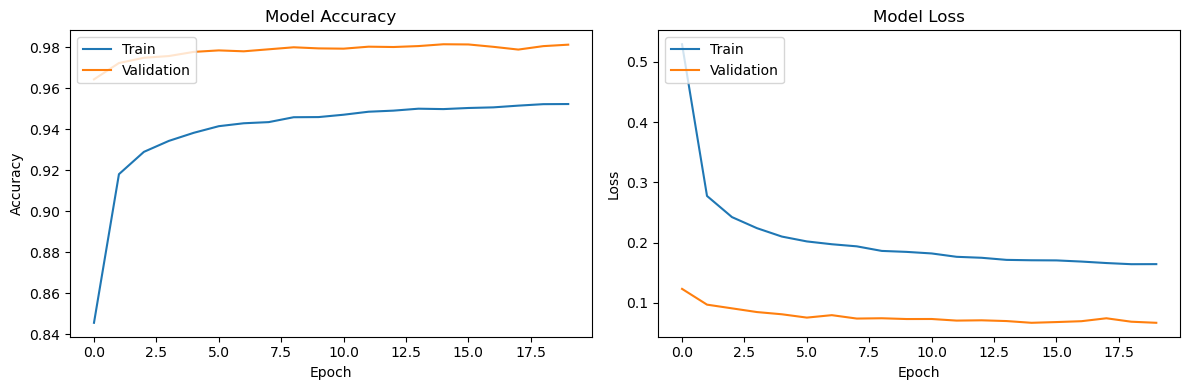

Test Accuracy: 0.9814740419387817

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2806
           1       0.98      0.98      0.98      1673
           2       0.99      0.97      0.98      4742
           3       0.97      0.91      0.94      2044
           4       0.97      0.98      0.97      2214
           5       0.93      0.82      0.87       231
           6       0.97      0.96      0.97      1183
           7       0.97      0.96      0.97      1466
           8       0.96      0.84      0.89       237
           9       0.98      0.97      0.98      1668
          10       0.98      0.98      0.98      1132
          11       0.98      0.98      0.98      2319
          12       0.98      0.99      0.98      2487
          13       0.99      0.98      0.99      3756
          14       0.98      0.99      0.98     11629
          15       0.98      0.99      0.99      3868
          16       0.9

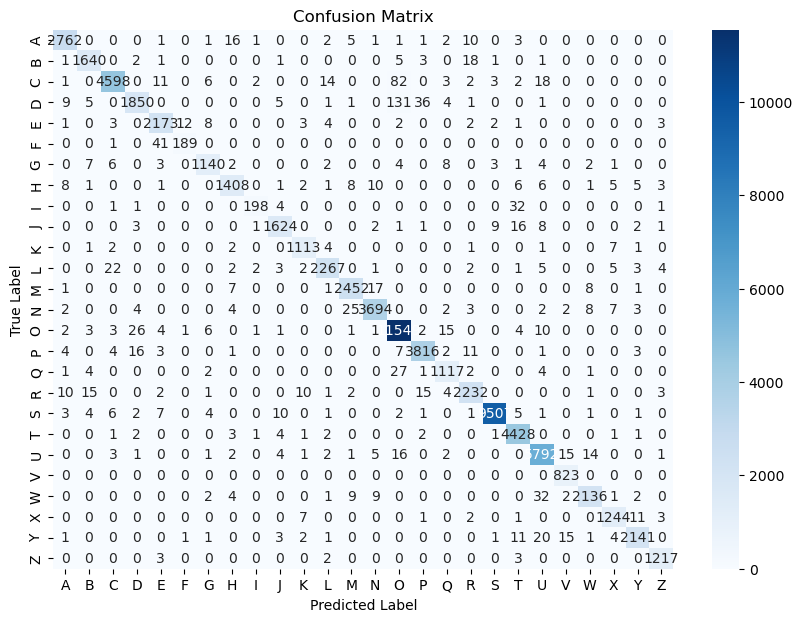

In [9]:
model.load_weights('/Volumes/Personal/ML_Code Alpha/Handwritten-Character-Recognition/best_model.h5')
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

classification_rep = classification_report(y_true, y_pred_classes)
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_rep)
# print("\nConfusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[chr(i + ord('A')) for i in range(26)],
            yticklabels=[chr(i + ord('A')) for i in range(26)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Test Dataset Prediction

2328/2328 [==============================] - 4s 2ms/step


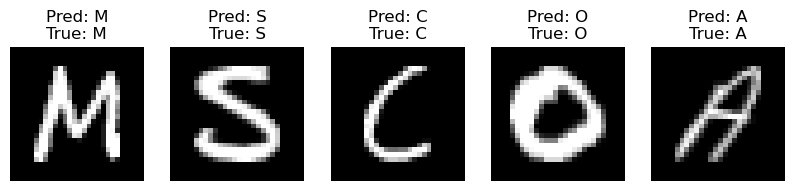

In [10]:
# Predict on test data and visualize predictions
def predict_and_visualize(X, y, model, num_samples=5):
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y, axis=1)

    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {chr(predicted_classes[i] + ord('A'))}\nTrue: {chr(true_classes[i] + ord('A'))}")
        plt.axis('off')
    plt.show()

# Predict and visualize the results
predict_and_visualize(X_test, y_test, model)

# Prediction with Model

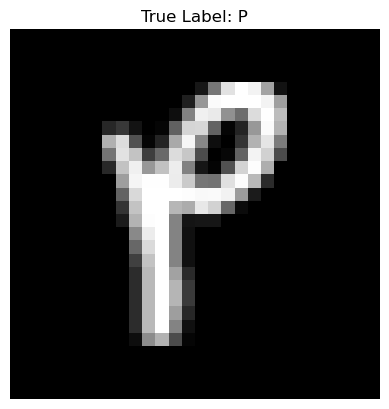

1/1 [==============================] - 0s 110ms/step
Predicted Label: P


2024-08-26 23:16:20.869723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('model.h5')

# Load the dataset
data = pd.read_csv('/Volumes/Personal/ML_Code Alpha/Handwritten-Character-Recognition/A-Z handwritten characters/A_Z Handwritten Data.csv').astype('float32')
X = data.drop('0', axis=1).values
y = data['0'].values

X = X.reshape(X.shape[0], 28, 28, 1) / 255.0
y = to_categorical(y, num_classes=26)

# Select a random image from the dataset
index = np.random.randint(0, X.shape[0])
sample_image = X[index]
sample_label = np.argmax(y[index])

# Display the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {chr(sample_label + 65)}")
plt.axis('off')
plt.show()

# Prepare the image for prediction
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Predict the label
prediction = model.predict(sample_image_expanded)
predicted_label = np.argmax(prediction, axis=1)[0]

print(f"Predicted Label: {chr(predicted_label + 65)}")
